<a href="https://colab.research.google.com/github/joggerweekly/vision/blob/main/berry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

img.shape
logic
crop
contour


array([[[117, 146, 155],
        [110, 139, 148],
        [116, 145, 154],
        ...,
        [ 11, 150, 136],
        [  3, 148, 134],
        [  4, 148, 134]],

       [[118, 147, 156],
        [119, 148, 157],
        [116, 145, 154],
        ...,
        [  9, 154, 139],
        [  6, 153, 139],
        [  3, 148, 134]],

       [[120, 149, 158],
        [119, 148, 157],
        [115, 144, 153],
        ...,
        [ 12, 153, 140],
        [ 13, 153, 138],
        [ 12, 151, 137]],

       ...,

       [[144, 153, 148],
        [157, 160, 158],
        [169, 168, 168],
        ...,
        [155, 162, 168],
        [150, 155, 160],
        [136, 140, 141]],

       [[146, 153, 150],
        [160, 160, 159],
        [175, 173, 172],
        ...,
        [151, 160, 167],
        [163, 173, 179],
        [126, 132, 135]],

       [[147, 151, 149],
        [158, 160, 158],
        [184, 186, 183],
        ...,
        [110, 118, 123],
        [114, 124, 130],
        [117, 127, 130]]], dtype=uint8)
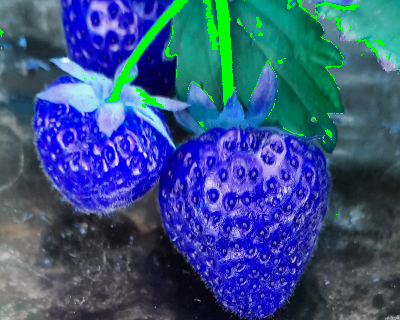

In [17]:
# cv2.imshow is not supported in colab because it crashes

import matplotlib.pyplot as plt
import cv2
import numpy as np
import urllib.request

def url_to_image(url):
    # Download the image, convert it to a NumPy array, and then read it into OpenCV format
    try:
        url_response = urllib.request.urlopen(url)
        # Read the response and convert to a byte array
        img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
        # Use cv2.imdecode to turn the array into an image
        image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
        return image
    except Exception as e:
        print(f"Error fetching or decoding image: {e}")
        return None

# Example Usage:
image_url = "https://github.com/joggerweekly/vision/blob/main/4.jpg?raw=true" # Replace with a valid image URL
img = url_to_image(image_url)

if img is not None:
    # Display the image in a window
    print("img.shape")
else:
    print("Could not load image. Check the URL and your internet connection.")

###############
# logic

print("logic")
#Dimensions (dsize): Defined as a tuple (width, height). Note that this is the opposite of the shape attribute, which returns (height, width)
new_dimensions = (1024, 768)
imageFrame = cv2.resize(img, new_dimensions)

# extends upwards for testing
# should extends along the peduncle

# Crop the image using slicing
imageFrame = imageFrame[0: 320, 300:700]
print("crop")
# run color seg for peduncle on cropped image


# color space
hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV)


# Set range for yellowish-green
# define mask

lower_yellowish_green = np.array([24, 100, 100])
upper_yellowish_green = np.array([30, 255, 255])
mask = cv2.inRange(hsvFrame, lower_yellowish_green, upper_yellowish_green)

# Morphological Transform, Dilation
# for each color and bitwise_and operator
# between imageFrame and mask determines
# to detect only that particular color
# kernel = np.ones((5, 5), "uint8")
# mask = cv2.dilate(mask, kernel)

res__yellowish_green = cv2.bitwise_and(imageFrame, imageFrame,
                        mask = mask)

contours, hierarchy = cv2.findContours(mask,
                                    cv2.RETR_TREE   ,
                                    cv2.CHAIN_APPROX_SIMPLE)
print('contour')
cv2.drawContours(imageFrame,  contours, -1, (0,255,0), cv2.FILLED)
#print('drawn')



In [19]:
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    print(area)

0.0
1.0
0.0
0.0
0.0
1.0
27.5
0.0
5.5
0.0
9.0
0.0
2.5
0.0
0.0
0.0
1.0
0.0
0.0
5.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
123.5
1.5
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
11.0
2.0
11.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.5
28.0
24.5
0.0
55.5
6.0
0.5
3.5
8.0
0.0
9.0
0.5
0.0
2.0
2.0
14.0
7.0
29.0
4.5
28.5
5.0
0.0
93.0
0.0
32.0
15.5
0.0
1303.5
2.0
2.0
25.5
2.0
856.5


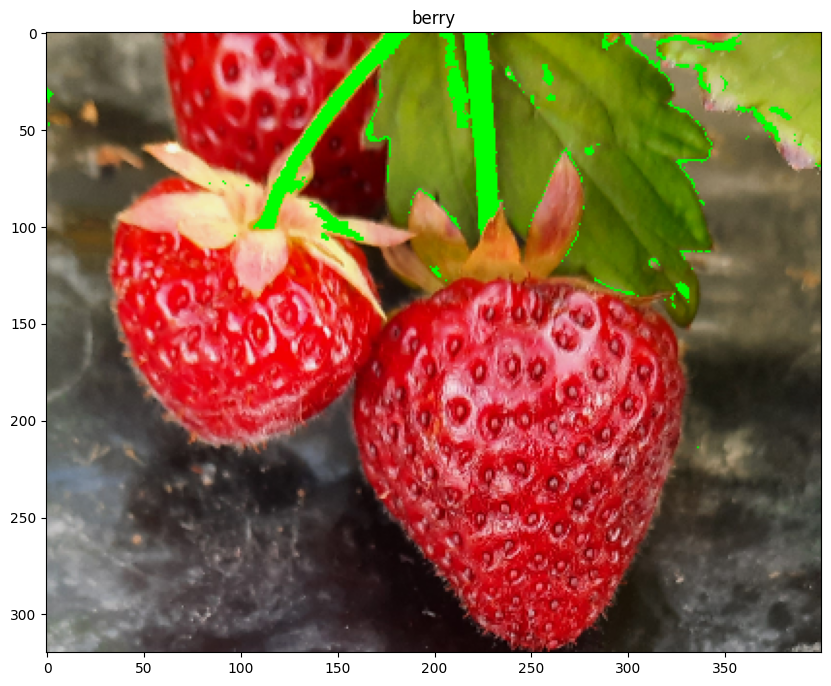

In [14]:
# display
img = imageFrame
figsize = (10, 20)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=figsize)
plt.imshow(img)
plt.title("berry")
plt.show()
